In [ ]:
# ── 0_install_deps.ipynb ──
import importlib, subprocess, sys
# List your packages (matplotlib covers matplotlib.pyplot)
dependencies = ["numba", "numpy", "matplotlib", "tqdm"]

for pkg in dependencies:
    if importlib.util.find_spec(pkg) is None: # type: ignore
        print(f"Installing {pkg}…")
        subprocess.check_call([sys.executable, "-m", "pip", "install", pkg])
    else:
        # optional: uncomment next line to see which ones were already present
        print(f"{pkg} already installed")
        pass

In [3]:
import numpy as np
import os
import utilities.update
from utilities.simulation import Simulation2, Simulation3
import settings.settings_task2 as settings
import settings.settings_task3 as settings3
# import pandas as pd
import matplotlib.pyplot as plt
import logging
from utilities import utils

settings.init(10)
settings3.init(10)

# Initializing the system

In [ ]:
# Set up output folder creation and logging
output_dir = utils.create_output_directory()
utils.setup_logging(output_dir)

# Task 2

In [ ]:
import task2
task2.main()

In [ ]:
data = np.loadtxt('output/run_3/Task2unwrapped10_nsteps_20000')
                            # (f,)

# blk = 256
# x  = data[:, 1          : 1 + blk]
# y  = data[:, 1 + blk    : 1 + 2*blk]
# z  = data[:, 1 + 2*blk  : 1 + 3*blk]
# vx = data[:, 1 + 3*blk  : 1 + 4*blk]
# vy = data[:, 1 + 4*blk  : 1 + 5*blk]
# vz = data[:, 1 + 5*blk  : 1 + 6*blk]

In [ ]:
np.shape(data)
blk = 256
x  = data[:, 1          : 1 + blk]
y  = data[:, 1 + blk    : 1 + 2*blk]
z  = data[:, 1 + 2*blk  : 1 + 3*blk]
vx = data[:, 1 + 3*blk  : 1 + 4*blk]
vy = data[:, 1 + 4*blk  : 1 + 5*blk]
vz = data[:, 1 + 5*blk  : 1 + 6*blk]

## Task 3

In [ ]:
import task3
task3.main()

In [ ]:
# bin_dr_arr = np.linspace(0, settings3.L/2, len(g_of_r)) + 0.5*settings3.dr

# plt.figure(figsize=(8,5))

# plt.plot(bin_dr_arr, g_of_r_list[0], label=r"$g(r)$ 10")  

# plt.plot(bin_dr_arr, g_of_r_list[1], label=r"$g(r)$ 100")  
# plt.plot(bin_dr_arr, g_of_r_list[2], label=r"$g(r)$ 333")  
# plt.plot(bin_dr_arr, g_of_r_list[3], label=r"$g(r)$ 666")  
# plt.plot(bin_dr_arr, g_of_r_list[4], label=r"$g(r)$ 1000")  
# plt.xlabel("r")
# plt.ylabel("g(r)")
# # plt.xlim(1.5, settings3.L/2)
# plt.ylim(0, 6)
# plt.legend()
# # plt.title("")
# plt.tight_layout()
# # plt.savefig('part_c_energies.pdf', dpi=150)

# Task 4 
(hat Arvid angefangen, funktioniert auch schon, aber ist noch nicht validiert)
Ihr könnt gerne Task 4 umschreiben / neu schreiben nach belieben

In [ ]:
import task4
task4.main()

In [ ]:
from scipy.stats import linregress

x = [0, 1, 2, 3]
y = [0, 2, 4, 6]

slope, intercept, _, _, _ = linregress(x, y)
print(type(slope))
print(slope)  # Output: 2.0

sig + delta = 1.00, 0.01
N, Zprimesqrd = 343.00, 30576.67
lambda_B, kappa_D = 0.01, 5.01
kBT, A = 1.00, 0.10
sig + delta = 1.00, 0.01
N, Zprimesqrd = 343.00, 30576.67
lambda_B, kappa_D = 0.01, 5.01
kBT, A = 1.00, 0.10


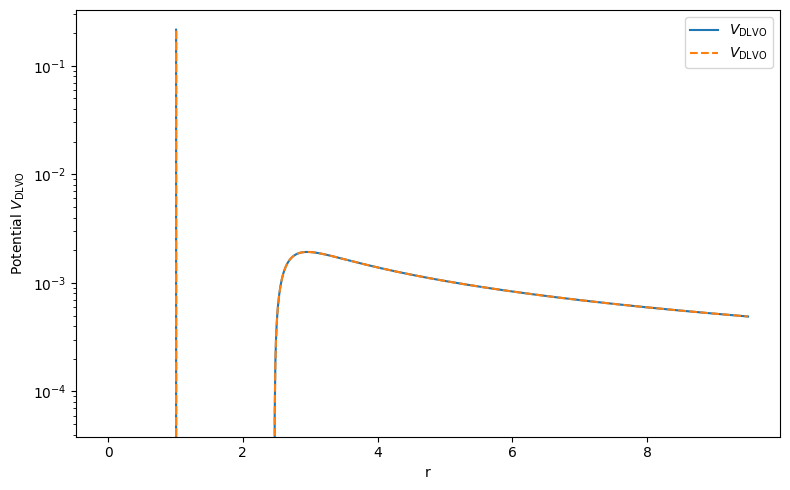

In [ ]:
def DLVO_potential(r, L, N, sig, delta, A, m, Zprimesqrd, lambda_B, kappa_D, kbT):
    """
    r: Array of distances r, for which the potential needs to be calculated
    """
    # convert to np array if needed
    r = np.asarray(r, dtype=float)
    
    # mask of where to use VDW+EL
    mask = r > (sig + delta)
    
    # Pre‐allocate output
    V = np.empty_like(r)
    
    # Case 1: Van der Waals + Electrostatic
    r1 = r[mask]
    # print(mask)
    VDW = A * sig / (24 * m * (r1 - sig))
    EL  = -Zprimesqrd * lambda_B * np.exp(-kappa_D * r1) * (1/r1 + kappa_D) / (m * r1)
    V[mask] = VDW + EL
    
    # Case 2: Lennard‐Jones‐type
    r2 = r[~mask]
    V[~mask] = -8 * kbT / m * (0.6 / r2**12 - 0.6 / r2**6)

    return V




r_array = np.linspace(0.0001, 9.5, 1000)

V_DLVO_Cs10 = DLVO_potential(r_array, settings3.L, settings3.N, settings3.sig, settings3.delta, settings3.A,
    settings3.m, settings3.Zprimesqrd, settings3.lambda_B, settings3.kappa_D, settings3.kBT)
print(f"sig + delta = {settings3.sig:.2f}, {settings3.delta:.2f}")
print(f"N, Zprimesqrd = {settings3.N:.2f}, {settings3.Zprimesqrd:.2f}")
print(f"lambda_B, kappa_D = {settings3.lambda_B:.2f}, {settings3.kappa_D:.2f}")
print(f"kBT, A = {settings3.kBT:.2f}, {settings3.A:.2f}")

settings3.init(100)
V_DLVO_Cs100 = DLVO_potential(r_array, settings3.L, settings3.N, settings3.sig, settings3.delta, settings3.A,
                              settings3.m, settings3.Zprimesqrd, settings3.lambda_B, settings3.kappa_D, settings3.kBT)

print(f"sig + delta = {settings3.sig:.2f}, {settings3.delta:.2f}")
print(f"N, Zprimesqrd = {settings3.N:.2f}, {settings3.Zprimesqrd:.2f}")
print(f"lambda_B, kappa_D = {settings3.lambda_B:.2f}, {settings3.kappa_D:.2f}")
print(f"kBT, A = {settings3.kBT:.2f}, {settings3.A:.2f}")



plt.figure(figsize=(8,5))

plt.plot(r_array, V_DLVO_Cs10, label=r"$V_\text{DLVO}$, Cs=10")  

plt.plot(r_array, V_DLVO_Cs100, label=r"$V_\text{DLVO}$, Cs=100", linestyle='--')  
plt.yscale('log')
plt.xlabel("r")
plt.ylabel(r"Potential $V_\text{DLVO}$")
# plt.xlim(1.5, settings3.L/2)
# plt.ylim(, 0)
plt.legend()
# plt.title("")
plt.tight_layout()
